In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime

In [89]:
df = pd.read_csv('ltc.csv')
df = df.set_index('time')

Text(0.5, 1.0, 'Historical hash rate')

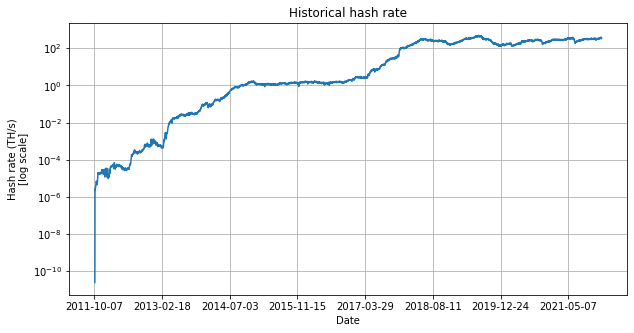

In [110]:
ax = df['HashRate'].plot(figsize=(10,5), logy=True)
ax.set_ylabel('Hash rate (TH/s)\n[log scale]')
ax.set_xlabel('Date')
ax.grid(axis='both')
plt.title('Historical hash rate')

Text(0.5, 1.0, 'Mining remuneration components')

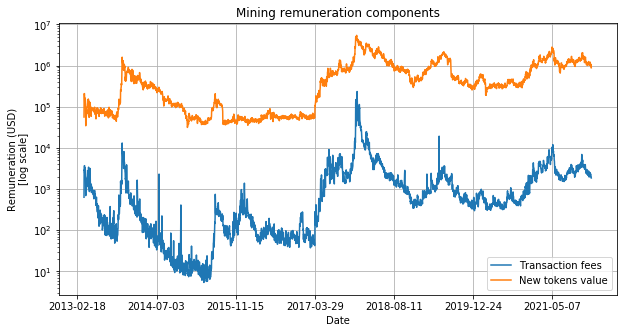

In [112]:
ax = df['FeeTotUSD'].plot(figsize=(10,5), logy=True, label='Transaction fees')
ax.set_ylabel('Remuneration (USD)\n[log scale]')
ax.set_xlabel('Date')
ax.plot(df['IssTotUSD'], label='New tokens value')
ax.grid(axis='both')
ax.legend()
plt.title('Mining remuneration components')

In [83]:
dates = pd.to_datetime(df.index).date
days_from_start = np.array(list(map(lambda delta: delta.days, dates - dates.min())))
days_from_start = days_from_start / days_from_start.max()


Text(0.5, 1.0, 'Total remutration / Hash rate\nScatterplot')

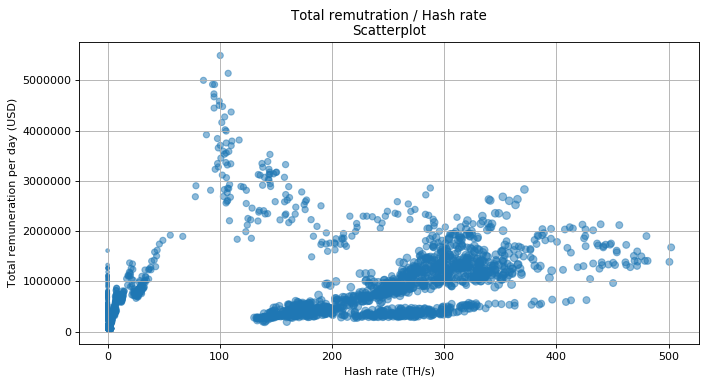

In [115]:
total_usd = df['IssTotUSD'] + df['FeeTotUSD']
hash_rate = df['HashRate']

sizes = 50 * days_from_start 

ax = plt.figure(figsize=(10, 5), dpi=80)
plt.grid(axis='both')
plt.scatter(hash_rate, total_usd, s=sizes, alpha=0.5)
plt.xlabel('Hash rate (TH/s)')
plt.ylabel('Total remuneration per day (USD)')
plt.title('Total remutration / Hash rate\nScatterplot')


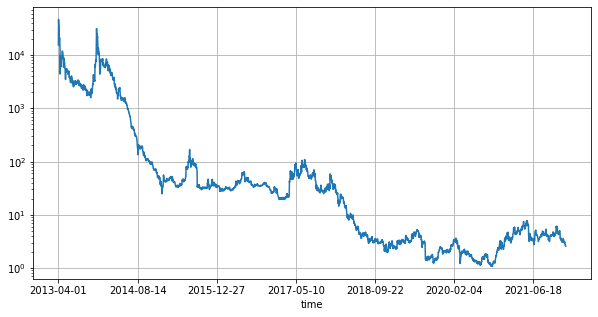

In [82]:
usd_per_giga_hash_per_sec = (total_usd / hash_rate / 1000).dropna()

ax = usd_per_giga_hash_per_sec.plot(logy = True, figsize=(10, 5))
ax.grid(axis='both')
plt.title('')

Text(0.5, 0, 'Remuneration (USD per GHash/s per day)')

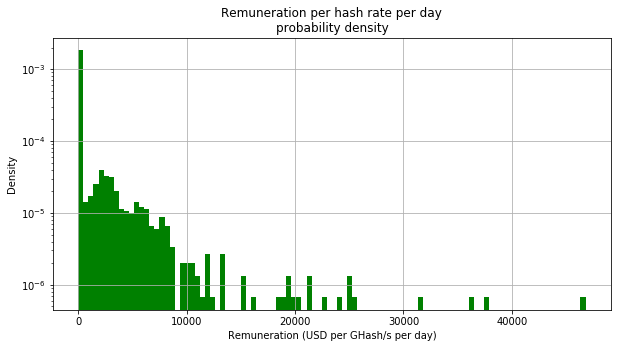

In [134]:

usd_per_giga_hash_per_sec.plot.hist(bins = 100, logy=True, figsize=(10, 5), color='g', density=True)
plt.grid(axis='both')
plt.title('Remuneration per hash rate per day\nprobability density')
plt.ylabel('Density')
plt.xlabel('Remuneration (USD per GHash/s per day)')


Summary statistics

In [72]:
usd_per_giga_hash_per_sec.describe()

count     3205.000000
mean       717.720108
std       2557.615613
min          1.068469
25%          3.354697
50%         28.540360
75%         58.140544
max      46806.482369
dtype: float64

Quatiles overall

In [125]:
source = usd_per_giga_hash_per_sec 
sorted_arr = sorted(source)

print(f'From {source.index.min()} to {source.index.max()}')
for q in (50, 75, 90, 95, 99):
  quantile = sorted_arr[int(len(sorted_arr) * q / 100)]
  print(f'{q}% of days, remuneration is <= {quantile:.2f}$ per GHash/s')


From 2013-04-01 to 2022-01-08
50% of days, remuneration is <= 28.54$ per GHash/s
75% of days, remuneration is <= 58.14$ per GHash/s
90% of days, remuneration is <= 2318.64$ per GHash/s
95% of days, remuneration is <= 4652.95$ per GHash/s
99% of days, remuneration is <= 10697.45$ per GHash/s


Quantiles last 2 years

In [127]:
source = usd_per_giga_hash_per_sec[usd_per_giga_hash_per_sec.index > '2020-01-08']
sorted_arr = sorted(source)

print(f'From {source.index.min()} to {source.index.max()}')
for q in (50, 75, 90, 95, 99):
  quantile = sorted_arr[int(len(sorted_arr) * q / 100)]
  print(f'{q}% of days, remuneration is <= {quantile:.2f}$ per GHash/s')

From 2021-01-09 to 2022-01-08
50% of days, remuneration is <= 4.21$ per GHash/s
75% of days, remuneration is <= 4.91$ per GHash/s
90% of days, remuneration is <= 5.96$ per GHash/s
95% of days, remuneration is <= 6.39$ per GHash/s
99% of days, remuneration is <= 7.61$ per GHash/s
